<a href="https://colab.research.google.com/github/ImanFakury/imanRepository/blob/master/DeepLearning%5CCHW4%5CQ3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Deep Learning - HW4 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3 <br>
<font color=696880 size=4>
    Iman Alizadeh Fakouri(401102134)

____

# Personal Data

In [ ]:
# Set your student number
student_number = '401102134'
Name = 'Iman'
Last_Name = 'Alizadeh Fakouri'

# Rules
- Make sure that all of your cells can be run perfectly.
- Try to minimize your use of ChatGPT (or any other AI assistant) as much as possible.
- You must create a report for this task in PDF format and explain the main results.

---

## **Introduction**

Large Language Models (LLMs) are a class of deep learning models designed for processing and generating natural language. These models are trained using large amounts of textual data and utilize architectures based on transformers. Some of the applications of these models include text generation, machine translation, text summarization, question answering, and text classification.

### *Encoder-Decoder LLMs*

One of the common architectures in large language models is the Encoder-Decoder architecture. In this architecture, the encoder processes an input sequence and maps it to a latent space. Then, the decoder uses this latent space to generate an output sequence. Models like T5 [1] (Text-to-Text Transfer Transformer) use this architecture to perform various tasks. In T5, all tasks are expressed in a "text-to-text" format, meaning both input and output are text. This model has capabilities such as translation, summarization, and text classification. One of the advantages of the Encoder-Decoder architecture is that it allows the encoder to utilize information from both before and after a word to gain a more comprehensive understanding of the text.

### *Decoder-only LLMs*

Decoder-only models, such as GPT-2, GPT-3, and LLaMA [2], unlike the Encoder-Decoder architecture, only use the decoder part. These models use an autoregressive mode, meaning they predict the next token based on previous tokens. These models are highly efficient for text generation and have found widespread applications today.

Advantages of Decoder-only Models

- Efficiency: Decoder-only models are more efficient than Encoder-Decoder models due to the absence of an independent encoder. This makes them require fewer computational and memory resources.
- Simplicity: Due to their autoregressive nature, these models can easily generate sequences in order.
- Scalability: Due to their simpler architecture, these models can be scaled to much larger sizes.


However, one of the drawbacks of these models is that they can only utilize information from tokens before the current token and cannot use tokens that come after for prediction. This limitation is significant in tasks like classification or translation, where a full understanding of the sequence is needed.



## **Objective of the Exercise**


In this exercise, the goal is to convert a generative Decoder-only language model into an encoder and evaluate its performance on a binary sentiment classification task. The main aim is to modify the Decoder-only model so that it can function as an encoder and better handle tasks requiring bidirectional understanding.

## **In this exercise, you should:**


### In this exercise, you should:

1. **Import a Decoder-only model** and load the weights of a pre-trained version of the model.
2. **Generate several outputs from the model**, and include at most 10 sample outputs in your report for different inputs.  
   You should also briefly explain the effects of key configurations in text generation, including:  
   - `Temperature`
   - `top_k`
   - `top_p`
   - `repetition_penalty`
   - `num_beams`
   - `no_repeat_ngram_size`
3. **Load the SST-2 dataset**, which is part of the GLUE benchmark for sentiment classification.  
   - Note that the model’s output depends on the number of input tokens.
   - Apply necessary padding to the dataset after loading it to allow for parallel execution of the model.
4. **Remove the model’s final layer**, which outputs to the size of the model’s dictionary.  
   - Use the embedding vector of the first token (CLS token) for classification.
5. As observed in the previous step, sometimes the embedding vector of the first token does not provide a good representation of the entire input text.  
   - **Add a linear layer** with the same input and output dimensions on top of the encoder's output, and use the output of this linear layer (corresponding to the CLS token) for classification.  
   - This step aggregates information of different tokens to get a comprehensive understanding of the input text.
6. **Instead of the linear layer** in the previous section, use a **bidirectional attention layer** with a custom number of heads (preferably 12).
7. **Repeat step 6** using **left-to-right unidirectional attention** and **right-to-left unidirectional attention**.
8. **Load a pre-trained decoder** (preferably BERT-base) and report its **zero-shot performance** (i.e., without needing to train the model) on the test data.

## **Evaluation:**

In this exercise, for each of sections 4, 5, 6, 7, and 8, you need to plot the confusion matrix corresponding to the model's performance on the test data. Additionally, you should plot two separate graphs showing the training loss and the accuracy of the trained models, and compare them with each other, providing an appropriate analysis of your results. Also, note that high accuracy is not expected for sections 4 and 5, but the correctness of your code will be checked. However, for sections 6 and 7, higher accuracy (around 90%) is expected.













## **Let's go:**


Load `gpt2` model:

# Part 1 & 2

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
def generate_text(input_text, max_length=50, temperature=1.0, top_k=50, top_p=0.95,
                  repetition_penalty=1.0, num_beams=1, no_repeat_ngram_size=2):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)
    attention_mask = torch.ones(input_ids.shape, device=device)
    pad_token_id = tokenizer.eos_token_id
    output = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=max_length,
        temperature=temperature,
        top_k=top_k,
        top_p=top_p,
        repetition_penalty=repetition_penalty,
        num_beams=num_beams,
        no_repeat_ngram_size=no_repeat_ngram_size,
        pad_token_id=pad_token_id,
        eos_token_id=tokenizer.eos_token_id
    )

    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text
inputs = [
    "The future of artificial intelligence is",
    "The economy is changing due to",
    "In the year 2050, people will",
    "Climate change is one of the most",
    "The role of technology in education is",
    "In a distant galaxy, there was",
    "The internet of things is transforming",
    "The impact of social media on society is",
    "Self-driving cars are expected to",
    "The rise of renewable energy is"
]

generated_outputs = [generate_text(input_text=input_text, max_length=50) for input_text in inputs]
for i, output in enumerate(generated_outputs):
    print(f"Input {i+1}: {inputs[i]}")
    print(f"Generated Output {i+1}: {output}\n")


Input 1: The future of artificial intelligence is
Generated Output 1: The future of artificial intelligence is uncertain.

"We're not sure what the future will look like," said Dr. Michael S. Schoenfeld, a professor of computer science at the University of California, Berkeley. "But we're very

Input 2: The economy is changing due to
Generated Output 2: The economy is changing due to the rise of the internet, and the fact that it is becoming more and more difficult to find jobs.

The government has been trying to get the economy back on track, but it has not been able to do

Input 3: In the year 2050, people will
Generated Output 3: In the year 2050, people will be able to buy a home in the United States, and the average home price will rise by $1,000.

The average American household will have a median income of $50,400, according to

Input 4: Climate change is one of the most
Generated Output 4: Climate change is one of the most pressing issues facing the world today.

The world's pop

Key configuration parameters in text generation include:

- **Temperature**: Controls randomness, with higher values (e.g., 1.5) producing more diverse outputs and lower values (e.g., 0.7) producing more focused ones.
- **top_k**: Limits token selection to the top k most likely next tokens, e.g., top_k=50 selects the top 50 tokens.
- **top_p (Nucleus Sampling)**: Selects the smallest set of tokens whose cumulative probability is > p (e.g., top_p=0.95).
- **Repetition Penalty**: Penalizes repetition, encouraging diverse outputs when set greater than 1.0.
- **num_beams**: Controls beam search, where higher values produce more coherent but less random outputs.
- **no_repeat_ngram_size**: Prevents the model from repeating n-grams, such as bigrams, for diversity.

# Part 3

In [4]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Model
import torch
from torch import nn

device = torch.device("cpu")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [5]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


Load `sst-2` dataset:

In [6]:
from datasets import load_dataset
dataset = load_dataset("glue", "sst2")

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [7]:
def tokenize_function(examples):
    tokenizer.pad_token = tokenizer.eos_token
    return tokenizer(examples["sentence"])
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

# Part 4 & 5

go ahead:

In [ ]:
import torch.nn as nn
from transformers import  Trainer, TrainingArguments, DataCollatorWithPadding

device = torch.device("cuda")

class gpt_model(nn.Module):
    def __init__(self):
        super(gpt_model, self).__init__()
        self.gpt2 = GPT2LMHeadModel.from_pretrained("gpt2")
        self.gpt2.config.tie_word_embeddings = False
        self.linear = nn.Linear(self.gpt2.config.hidden_size, 2)

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
        hidden_states = outputs.hidden_states[-1]
        logits = self.linear(hidden_states)
        loss = None
        if labels is not None:
            logits = logits.mean(dim=1)
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits} if labels is not None else {"logits": logits}

model = gpt_model().to(device)

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
def compute_metrics(pred):
    logits, labels = pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

# Training

In [ ]:

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="no",
    save_total_limit=0,
    evaluation_strategy="epoch"
)


data_collator = DataCollatorWithPadding(tokenizer=tokenizer, pad_to_multiple_of=8)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    data_collator=data_collator,
        compute_metrics=compute_metrics
)
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.124600,0.595689,0.903670,0.930622,0.876126,0.902552
2,0.153900,0.490250,0.910550,0.899563,0.927928,0.913525
3,0.082200,0.557137,0.911697,0.908686,0.918919,0.913774


TrainOutput(global_step=12630, training_loss=0.12773739081569258, metrics={'train_runtime': 2098.0638, 'train_samples_per_second': 96.302, 'train_steps_per_second': 6.02, 'total_flos': 0.0, 'train_loss': 0.12773739081569258, 'epoch': 3.0})

# Evaluation

Test Accuracy: 0.91


<Figure size 800x800 with 0 Axes>

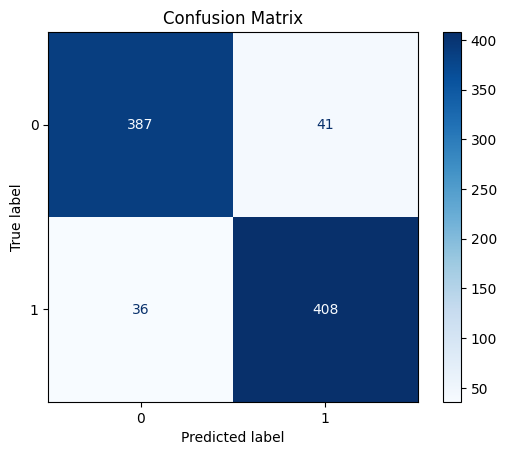

[{'loss': 0.1957, 'grad_norm': 7.673230171203613, 'learning_rate': 5e-05, 'epoch': 0.1187648456057007, 'step': 500}, {'loss': 0.1635, 'grad_norm': 9.541605949401855, 'learning_rate': 4.7938994229183846e-05, 'epoch': 0.2375296912114014, 'step': 1000}, {'loss': 0.1389, 'grad_norm': 4.380443096160889, 'learning_rate': 4.587798845836769e-05, 'epoch': 0.35629453681710216, 'step': 1500}, {'loss': 0.1392, 'grad_norm': 9.480506896972656, 'learning_rate': 4.3816982687551526e-05, 'epoch': 0.4750593824228028, 'step': 2000}, {'loss': 0.1401, 'grad_norm': 17.00290298461914, 'learning_rate': 4.175597691673537e-05, 'epoch': 0.5938242280285035, 'step': 2500}, {'loss': 0.134, 'grad_norm': 7.18624210357666, 'learning_rate': 3.969497114591921e-05, 'epoch': 0.7125890736342043, 'step': 3000}, {'loss': 0.1222, 'grad_norm': 1.4428716897964478, 'learning_rate': 3.7633965375103055e-05, 'epoch': 0.831353919239905, 'step': 3500}, {'loss': 0.1246, 'grad_norm': 5.660747051239014, 'learning_rate': 3.557295960428689

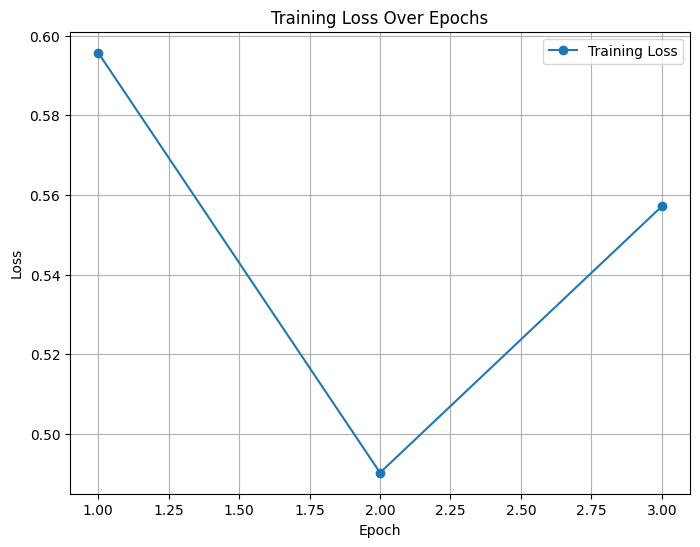

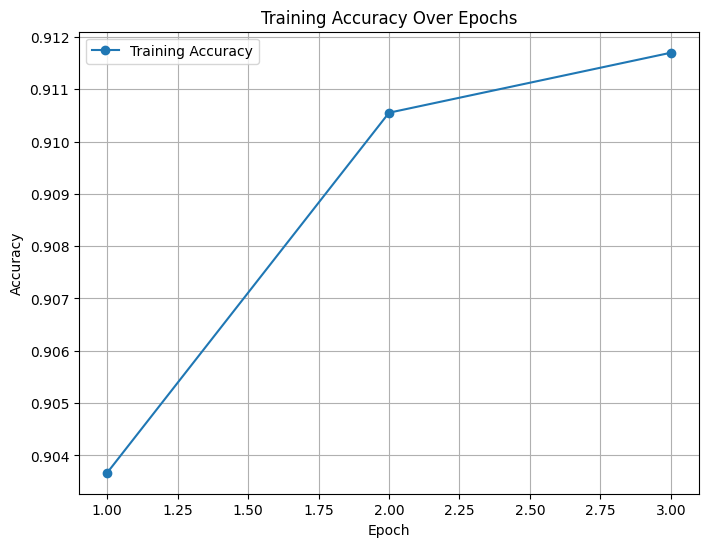

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
predictions = trainer.predict(test_dataset=tokenized_datasets['validation'])
logits = predictions.predictions
predicted_classes = np.argmax(logits, axis=-1)
true_labels = predictions.label_ids
accuracy = accuracy_score(true_labels, predicted_classes)


print(f"Test Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(true_labels, predicted_classes)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, colorbar=True)
plt.title("Confusion Matrix")
plt.show()




training_logs = trainer.state.log_history
print(training_logs)
losses = [log["eval_loss"] for log in training_logs if "eval_loss" in log]
accuracy_logs = [log["eval_accuracy"] for log in training_logs if "eval_accuracy" in log]
epochs = range(1, len(losses) + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, losses, marker='o', label='Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()




accuracy_logs = [log["eval_accuracy"] for log in trainer.state.log_history if "eval_accuracy" in log]
epochs = range(1, len(accuracy_logs) + 1)
if accuracy_logs:
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, accuracy_logs, marker='o', label='Training Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No accuracy logs available.")



# Part 6

In [ ]:
from transformers import GPT2Config
class BidirectionalAttentionLayer(nn.Module):
    def __init__(self, hidden_size, num_attention_heads):
        super(BidirectionalAttentionLayer, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=hidden_size, num_heads=num_attention_heads)

    def forward(self, hidden_states):
        return self.attention(hidden_states, hidden_states, hidden_states)[0]
class CustomGPT2(nn.Module):
    def __init__(self, model_name='gpt2', num_attention_heads=12):
        super(CustomGPT2, self).__init__()
        self.gpt2_config = GPT2Config.from_pretrained(model_name)
        self.gpt2 = GPT2Model.from_pretrained(model_name, config=self.gpt2_config)
        self.bidirectional_attention = BidirectionalAttentionLayer(
            hidden_size=self.gpt2.config.n_embd,
            num_attention_heads=num_attention_heads
        )

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state
        attention_output = self.bidirectional_attention(hidden_states)

        loss = None
        logits = attention_output.mean(dim=1)

        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)

        return {"loss": loss, "logits": logits} if labels is not None else {"logits": logits}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomGPT2(num_attention_heads=12).to(device)


# Training

In [ ]:
def compute_metrics(pred):
    logits, labels = pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="no",
    save_total_limit=0,
    evaluation_strategy="epoch"
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, pad_to_multiple_of=8)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.229000,0.264501,0.903670,0.941176,0.864865,0.901408
2,0.173800,0.310741,0.901376,0.903153,0.903153,0.903153
3,0.105100,0.372378,0.915138,0.920455,0.912162,0.916290


TrainOutput(global_step=12630, training_loss=0.24692074941059755, metrics={'train_runtime': 1984.1169, 'train_samples_per_second': 101.832, 'train_steps_per_second': 6.366, 'total_flos': 0.0, 'train_loss': 0.24692074941059755, 'epoch': 3.0})

# Evaluation

Test Accuracy: 0.92


<Figure size 800x800 with 0 Axes>

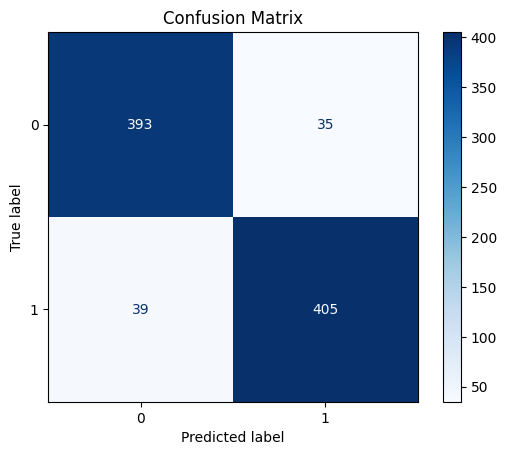

[{'loss': 1.7247, 'grad_norm': 46.810184478759766, 'learning_rate': 5e-05, 'epoch': 0.1187648456057007, 'step': 500}, {'loss': 0.4036, 'grad_norm': 2.281634569168091, 'learning_rate': 4.7938994229183846e-05, 'epoch': 0.2375296912114014, 'step': 1000}, {'loss': 0.3301, 'grad_norm': 12.018445014953613, 'learning_rate': 4.587798845836769e-05, 'epoch': 0.35629453681710216, 'step': 1500}, {'loss': 0.3048, 'grad_norm': 13.408225059509277, 'learning_rate': 4.3816982687551526e-05, 'epoch': 0.4750593824228028, 'step': 2000}, {'loss': 0.2748, 'grad_norm': 10.294028282165527, 'learning_rate': 4.175597691673537e-05, 'epoch': 0.5938242280285035, 'step': 2500}, {'loss': 0.2651, 'grad_norm': 17.978761672973633, 'learning_rate': 3.969497114591921e-05, 'epoch': 0.7125890736342043, 'step': 3000}, {'loss': 0.2452, 'grad_norm': 1.6256086826324463, 'learning_rate': 3.7633965375103055e-05, 'epoch': 0.831353919239905, 'step': 3500}, {'loss': 0.229, 'grad_norm': 8.320514678955078, 'learning_rate': 3.557295960

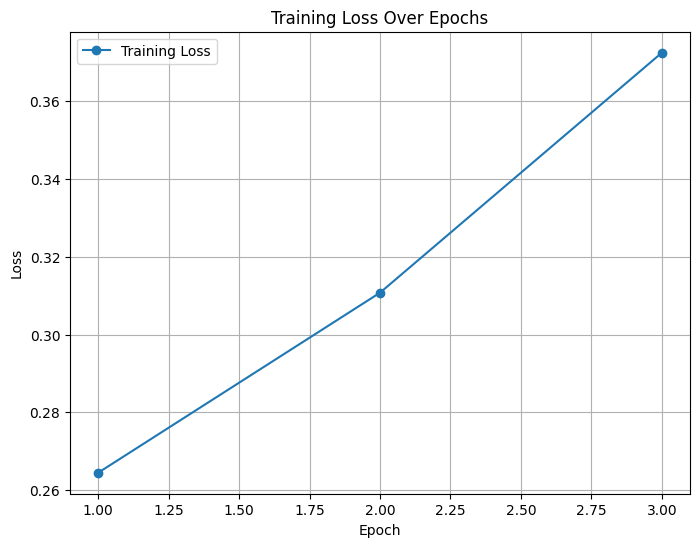

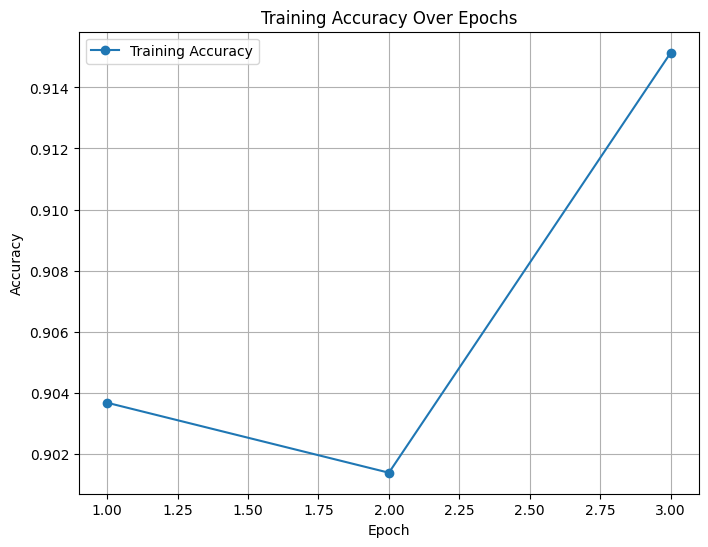

In [ ]:
predictions = trainer.predict(test_dataset=tokenized_datasets['validation'])
logits = predictions.predictions
predicted_classes = np.argmax(logits, axis=-1)
true_labels = predictions.label_ids
accuracy = accuracy_score(true_labels, predicted_classes)


print(f"Test Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(true_labels, predicted_classes)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, colorbar=True)
plt.title("Confusion Matrix")
plt.show()




training_logs = trainer.state.log_history
print(training_logs)
losses = [log["eval_loss"] for log in training_logs if "eval_loss" in log]
accuracy_logs = [log["eval_accuracy"] for log in training_logs if "eval_accuracy" in log]
epochs = range(1, len(losses) + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, losses, marker='o', label='Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()




accuracy_logs = [log["eval_accuracy"] for log in trainer.state.log_history if "eval_accuracy" in log]
epochs = range(1, len(accuracy_logs) + 1)
if accuracy_logs:
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, accuracy_logs, marker='o', label='Training Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No accuracy logs available.")



# Part 7

In [ ]:
device = torch.device("cuda")
class gpt_model(nn.Module):
    def __init__(self, direction='ltr'):
        super(gpt_model, self).__init__()
        self.gpt2 = GPT2LMHeadModel.from_pretrained("gpt2")
        self.gpt2.config.tie_word_embeddings = False
        self.linear = nn.Linear(self.gpt2.config.hidden_size, 2)
        self.direction = direction

    def forward(self, input_ids, attention_mask=None, labels=None):
        if self.direction == 'rtl':
            input_ids = torch.flip(input_ids, dims=[1])

        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
        hidden_states = outputs.hidden_states[-1]
        logits = self.linear(hidden_states)

        loss = None
        if labels is not None:
            logits = logits.mean(dim=1)
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)

        return {"loss": loss, "logits": logits} if labels is not None else {"logits": logits}
ltr_model = gpt_model(direction='ltr').to(device)
rtl_model = gpt_model(direction='rtl').to(device)


# Training

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    save_strategy="no",
    save_total_limit=0,
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, pad_to_multiple_of=8)


trainer_left_to_right = Trainer(
    model=ltr_model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)
trainer_left_to_right.train()

trainer_right_to_left = Trainer(
    model=rtl_model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer_right_to_left.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.127000,0.610176,0.901376,0.892544,0.916667,0.904444
2,0.143200,0.468321,0.903670,0.879747,0.939189,0.908497
3,0.086900,0.527963,0.909404,0.897603,0.927928,0.912514


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.368100,0.460310,0.822248,0.873385,0.761261,0.813478
2,0.293000,0.455185,0.837156,0.840090,0.840090,0.840090
3,0.230700,0.503381,0.830275,0.818966,0.855856,0.837004


TrainOutput(global_step=12630, training_loss=0.33489566238173774, metrics={'train_runtime': 2085.5526, 'train_samples_per_second': 96.879, 'train_steps_per_second': 6.056, 'total_flos': 0.0, 'train_loss': 0.33489566238173774, 'epoch': 3.0})

# Evaluation

Left-to-Right Test Accuracy: 0.91


<Figure size 800x800 with 0 Axes>

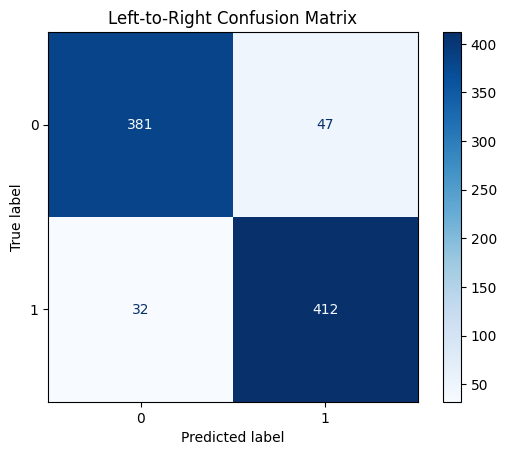

Left-to-Right Training Logs:
[{'loss': 0.1797, 'grad_norm': 4.576859951019287, 'learning_rate': 5e-05, 'epoch': 0.1187648456057007, 'step': 500}, {'loss': 0.1477, 'grad_norm': 4.128493785858154, 'learning_rate': 4.7938994229183846e-05, 'epoch': 0.2375296912114014, 'step': 1000}, {'loss': 0.1271, 'grad_norm': 12.18860912322998, 'learning_rate': 4.587798845836769e-05, 'epoch': 0.35629453681710216, 'step': 1500}, {'loss': 0.1215, 'grad_norm': 3.2572457790374756, 'learning_rate': 4.3816982687551526e-05, 'epoch': 0.4750593824228028, 'step': 2000}, {'loss': 0.1264, 'grad_norm': 6.226421356201172, 'learning_rate': 4.175597691673537e-05, 'epoch': 0.5938242280285035, 'step': 2500}, {'loss': 0.1084, 'grad_norm': 12.4434232711792, 'learning_rate': 3.969497114591921e-05, 'epoch': 0.7125890736342043, 'step': 3000}, {'loss': 0.1093, 'grad_norm': 0.048564836382865906, 'learning_rate': 3.7633965375103055e-05, 'epoch': 0.831353919239905, 'step': 3500}, {'loss': 0.127, 'grad_norm': 0.7444831132888794, '

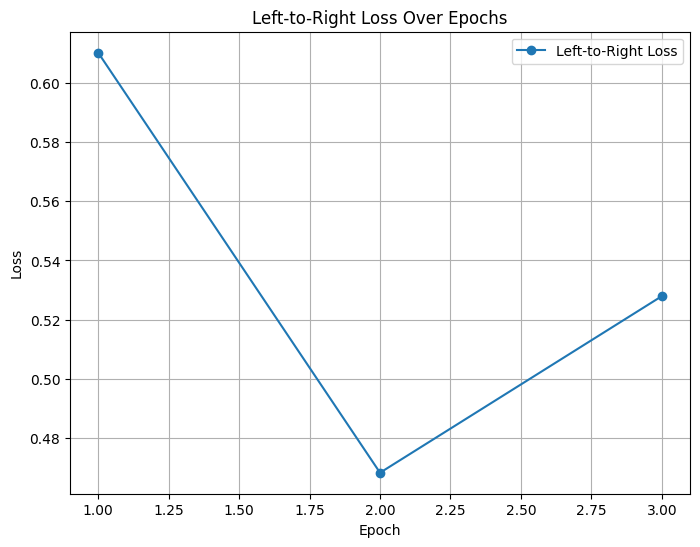

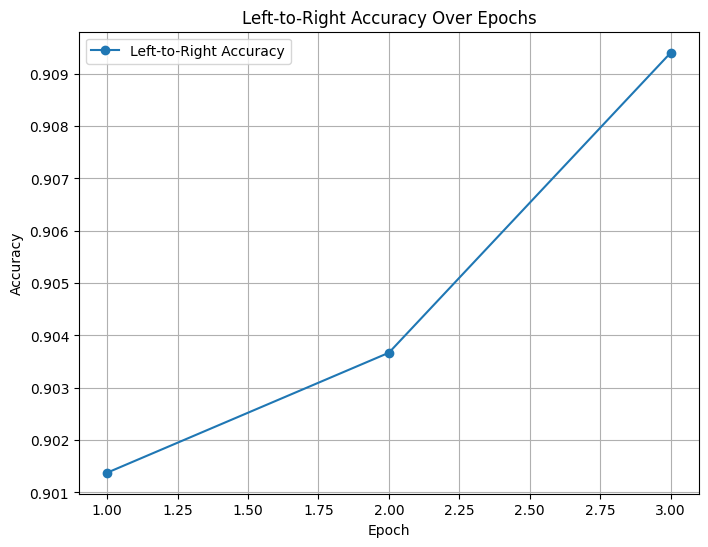

Right-to-Left Test Accuracy: 0.83


<Figure size 800x800 with 0 Axes>

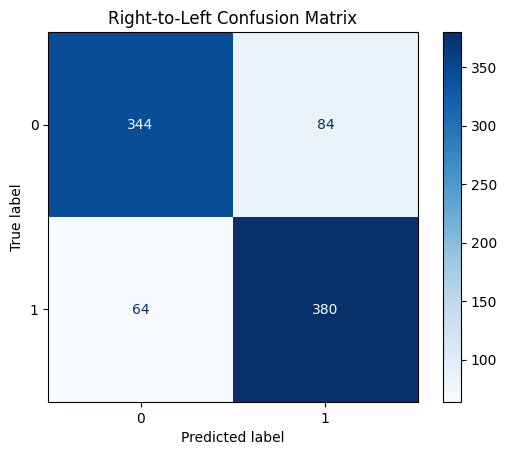

Right-to-Left Training Logs:
[{'loss': 0.7308, 'grad_norm': 36.512176513671875, 'learning_rate': 5e-05, 'epoch': 0.1187648456057007, 'step': 500}, {'loss': 0.5398, 'grad_norm': 9.004901885986328, 'learning_rate': 4.7938994229183846e-05, 'epoch': 0.2375296912114014, 'step': 1000}, {'loss': 0.4526, 'grad_norm': 4.259390354156494, 'learning_rate': 4.587798845836769e-05, 'epoch': 0.35629453681710216, 'step': 1500}, {'loss': 0.4189, 'grad_norm': 6.153046607971191, 'learning_rate': 4.3816982687551526e-05, 'epoch': 0.4750593824228028, 'step': 2000}, {'loss': 0.4041, 'grad_norm': 5.400052547454834, 'learning_rate': 4.175597691673537e-05, 'epoch': 0.5938242280285035, 'step': 2500}, {'loss': 0.3809, 'grad_norm': 11.861120223999023, 'learning_rate': 3.969497114591921e-05, 'epoch': 0.7125890736342043, 'step': 3000}, {'loss': 0.3806, 'grad_norm': 1.5906684398651123, 'learning_rate': 3.7633965375103055e-05, 'epoch': 0.831353919239905, 'step': 3500}, {'loss': 0.3681, 'grad_norm': 2.1968700885772705, 

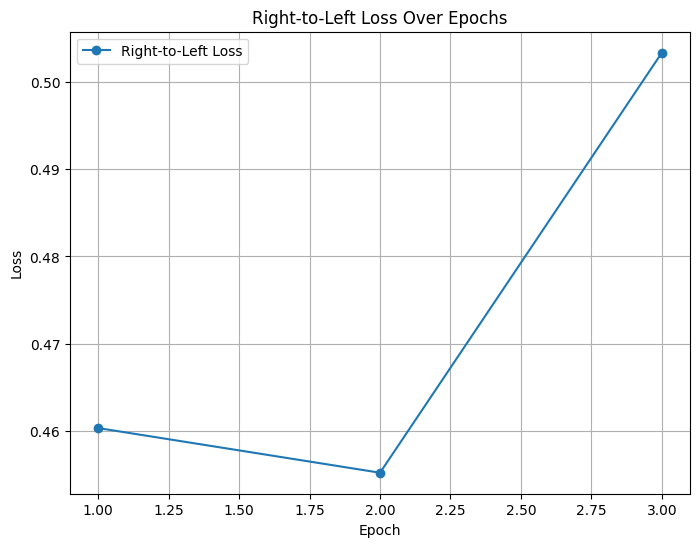

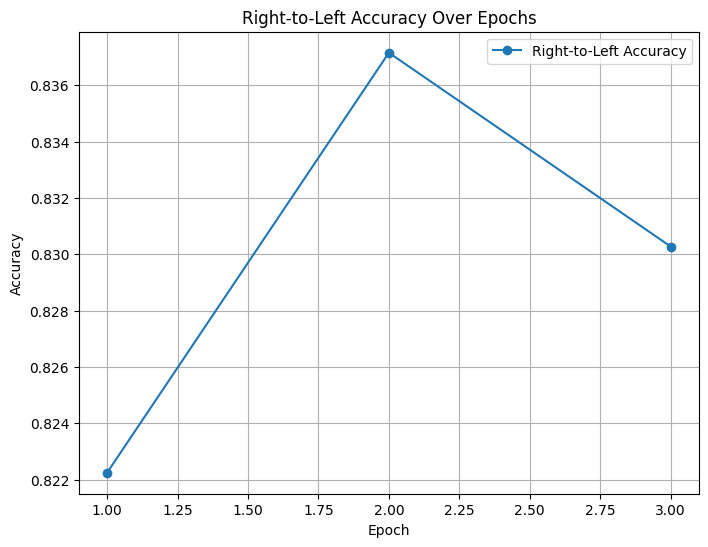

In [ ]:
ltr_predictions = trainer_left_to_right.predict(test_dataset=tokenized_datasets['validation'])
ltr_logits = ltr_predictions.predictions
ltr_predicted_classes = np.argmax(ltr_logits, axis=-1)
ltr_true_labels = ltr_predictions.label_ids

ltr_accuracy = accuracy_score(ltr_true_labels, ltr_predicted_classes)
print(f"Left-to-Right Test Accuracy: {ltr_accuracy:.2f}")

ltr_conf_matrix = confusion_matrix(ltr_true_labels, ltr_predicted_classes)
ltr_disp = ConfusionMatrixDisplay(ltr_conf_matrix, display_labels=[0, 1])
plt.figure(figsize=(8, 8))
ltr_disp.plot(cmap=plt.cm.Blues, colorbar=True)
plt.title("Left-to-Right Confusion Matrix")
plt.show()

ltr_training_logs = trainer_left_to_right.state.log_history
print("Left-to-Right Training Logs:")
print(ltr_training_logs)

ltr_losses = [log["eval_loss"] for log in ltr_training_logs if "eval_loss" in log]
ltr_epochs = range(1, len(ltr_losses) + 1)
if ltr_losses:
    plt.figure(figsize=(8, 6))
    plt.plot(ltr_epochs, ltr_losses, marker='o', label='Left-to-Right Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Left-to-Right Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

ltr_accuracy_logs = [log["eval_accuracy"] for log in ltr_training_logs if "eval_accuracy" in log]
if ltr_accuracy_logs:
    ltr_epochs = range(1, len(ltr_accuracy_logs) + 1)
    plt.figure(figsize=(8, 6))
    plt.plot(ltr_epochs, ltr_accuracy_logs, marker='o', label='Left-to-Right Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Left-to-Right Accuracy Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

rtl_predictions = trainer_right_to_left.predict(test_dataset=tokenized_datasets['validation'])
rtl_logits = rtl_predictions.predictions
rtl_predicted_classes = np.argmax(rtl_logits, axis=-1)
rtl_true_labels = rtl_predictions.label_ids

rtl_accuracy = accuracy_score(rtl_true_labels, rtl_predicted_classes)
print(f"Right-to-Left Test Accuracy: {rtl_accuracy:.2f}")

rtl_conf_matrix = confusion_matrix(rtl_true_labels, rtl_predicted_classes)
rtl_disp = ConfusionMatrixDisplay(rtl_conf_matrix, display_labels=[0, 1])
plt.figure(figsize=(8, 8))
rtl_disp.plot(cmap=plt.cm.Blues, colorbar=True)
plt.title("Right-to-Left Confusion Matrix")
plt.show()

rtl_training_logs = trainer_right_to_left.state.log_history
print("Right-to-Left Training Logs:")
print(rtl_training_logs)

rtl_losses = [log["eval_loss"] for log in rtl_training_logs if "eval_loss" in log]
rtl_epochs = range(1, len(rtl_losses) + 1)
if rtl_losses:
    plt.figure(figsize=(8, 6))
    plt.plot(rtl_epochs, rtl_losses, marker='o', label='Right-to-Left Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Right-to-Left Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

rtl_accuracy_logs = [log["eval_accuracy"] for log in rtl_training_logs if "eval_accuracy" in log]
if rtl_accuracy_logs:
    rtl_epochs = range(1, len(rtl_accuracy_logs) + 1)
    plt.figure(figsize=(8, 6))
    plt.plot(rtl_epochs, rtl_accuracy_logs, marker='o', label='Right-to-Left Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Right-to-Left Accuracy Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()


# Part 8

In [20]:
from transformers import BertTokenizer, BertForSequenceClassification


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to(device)


def tokenize_function(examples):
    return tokenizer(examples["sentence"], padding=True, truncation=True, max_length=512)

tokenized_test_dataset = dataset["validation"].map(tokenize_function, batched=True)

test_inputs = torch.tensor(tokenized_test_dataset["input_ids"]).to(device)
test_masks = torch.tensor(tokenized_test_dataset["attention_mask"]).to(device)
test_labels = torch.tensor(tokenized_test_dataset["label"]).to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Zero-Shot Test Accuracy: 0.52
Precision: 0.57
Recall: 0.23
F1 Score: 0.32


<Figure size 800x800 with 0 Axes>

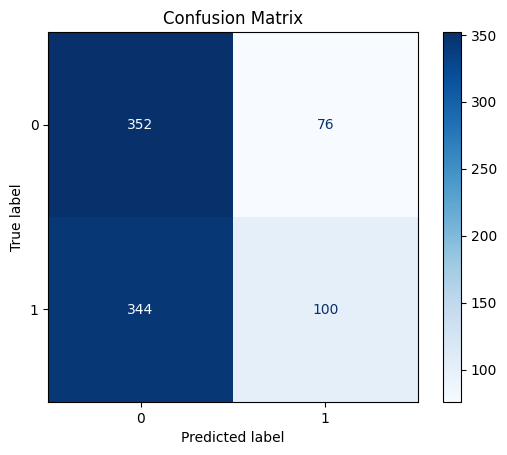

In [21]:
def evaluate_model(model, inputs, masks, labels):
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=inputs, attention_mask=masks)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        true_labels = labels.cpu().numpy()

    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average="binary")

    print(f"Zero-Shot Test Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    conf_matrix = confusion_matrix(true_labels, predictions)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
    plt.figure(figsize=(8, 8))
    disp.plot(cmap=plt.cm.Blues, colorbar=True)
    plt.title("Confusion Matrix")
    plt.show()

evaluate_model(model, test_inputs, test_masks, test_labels)


---------
### References

[1] Raffel, Colin, Noam Shazeer, Adam Roberts, et al. (2020). *Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer*. [Link to paper](https://arxiv.org/abs/1910.10683)

[2] Touvron, Hugo, et al. (2023). *LLaMA 2: Open Foundation and Fine-Tuned Chat Models*. [Link to paper](https://arxiv.org/abs/2307.09288)

<span style="color:yellow;">*For further reading on this field of research, you can refer to the following papers:*</span>

[3] BehnamGhader, Adlakha, et al. (2024). *LLM2Vec: Large Language Models Are Secretly Powerful Text Encoders*. [Link to paper](https://arxiv.org/abs/2404.05961)

[4] Gao, Tianyu, et al. (2021). *SimCSE: Simple Contrastive Learning of Sentence Embeddings*. [Link to paper](https://arxiv.org/abs/2104.08821)

[5] Lee, et al. (2023). *NV-Embed: Improved Techniques for Training LLMs as Generalist Embedding Models*. [Link to paper](https://arxiv.org/abs/2405.17428)




# **Best regards.**